<a href="https://colab.research.google.com/github/Abdessamad-ELMOTARAJJY/Email-Spam-Classifier-ML/blob/main/Email_sapm_classifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES AND SOME DATA ANALYSIS**

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
import re

In [5]:
#import dataset
email_data = pd.read_csv("email_data.csv",encoding='latin-1')
email_data.head()

,email,class
0,Subject: naturally irresistible your corporate...,spam
1,Subject: the stock trading gunslinger fanny i...,spam
2,Subject: unbelievable new homes made easy im ...,spam
3,Subject: 4 color printing special request add...,spam
4,"Subject: do not have money , get software cds ...",spam


In [7]:
#add email length
email_data['length']=email_data['email'].apply(len)
email_data.head()

,email,class,length
0,Subject: naturally irresistible your corporate...,spam,1484
1,Subject: the stock trading gunslinger fanny i...,spam,598
2,Subject: unbelievable new homes made easy im ...,spam,448
3,Subject: 4 color printing special request add...,spam,500
4,"Subject: do not have money , get software cds ...",spam,235


In [10]:
#dataset shape
print("dataset shape : {} rows and {} columns".format(len(data), len(data.columns)))

dataset shape : 5728 rows and 2 columns


In [12]:
#missing values
print("class null data: {}".format(email_data['class'].isnull().sum()))
print("email null data: {}".format(email_data['email'].isnull().sum()))

class null data: 0
email null data: 0


**EMAIL TEXT PRE-PROCESSING (NLP)**

*1-Remove punctuations*

In [13]:
#punctuation list
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
#Function to remove punctuations
def remove_punctuation(text):
      text_without_punct= "".join([char for char in text if char not in string.punctuation])
      return text_without_punct

email_data['email_nopunct']=email_data['email'].apply(lambda rp: remove_punctuation(rp))

In [15]:
email_data.head()

,email,class,length,email_nopunct
0,Subject: naturally irresistible your corporate...,spam,1484,Subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,spam,598,Subject the stock trading gunslinger fanny is...
2,Subject: unbelievable new homes made easy im ...,spam,448,Subject unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,spam,500,Subject 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...",spam,235,Subject do not have money get software cds fr...


*2-Tokenization*

In [16]:
#Function to Tokenize words

def tokenize(text):
      text_tokenize=re.split('\W+',text) 
      return text_tokenize

email_data['email_tokenized']=email_data['email_nopunct'].apply(lambda tk: tokenize(tk.lower())) #to lower as Python is case-sensitive.
 

In [17]:
email_data.head()

,email,class,length,email_nopunct,email_tokenized
0,Subject: naturally irresistible your corporate...,spam,1484,Subject naturally irresistible your corporate ...,"[subject, naturally, irresistible, your, corpo..."
1,Subject: the stock trading gunslinger fanny i...,spam,598,Subject the stock trading gunslinger fanny is...,"[subject, the, stock, trading, gunslinger, fan..."
2,Subject: unbelievable new homes made easy im ...,spam,448,Subject unbelievable new homes made easy im w...,"[subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,spam,500,Subject 4 color printing special request addi...,"[subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...",spam,235,Subject do not have money get software cds fr...,"[subject, do, not, have, money, get, software,..."


*3-Remove stopwords*

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
stopword = nltk.corpus.stopwords.words('english')# All English Stopwords

In [23]:
def remove_stopwords(text):
      text_nostopword=[word for word in text if word not in stopword] # To remove all stopwords
      return text_nostopword


email_data['email_nostopword']=email_data['email_tokenized'].apply(lambda sw: remove_stopwords(sw))


In [24]:
email_data.head()

,email,class,length,email_nopunct,email_tokenized,email_nostopword
0,Subject: naturally irresistible your corporate...,spam,1484,Subject naturally irresistible your corporate ...,"[subject, naturally, irresistible, your, corpo...","[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,spam,598,Subject the stock trading gunslinger fanny is...,"[subject, the, stock, trading, gunslinger, fan...","[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,spam,448,Subject unbelievable new homes made easy im w...,"[subject, unbelievable, new, homes, made, easy...","[subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,spam,500,Subject 4 color printing special request addi...,"[subject, 4, color, printing, special, request...","[subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...",spam,235,Subject do not have money get software cds fr...,"[subject, do, not, have, money, get, software,...","[subject, money, get, software, cds, software,..."


*4-data stemming*

In [25]:
ps = nltk.PorterStemmer()

def stemming(text):
    text_stemmed = [ps.stem(word) for word in text]
    return text_stemmed

email_data['email_stemmed'] = email_data['email_nostopword'].apply(lambda stm: stemming(stm))


In [26]:
email_data.head()

,email,class,length,email_nopunct,email_tokenized,email_nostopword,email_stemmed
0,Subject: naturally irresistible your corporate...,spam,1484,Subject naturally irresistible your corporate ...,"[subject, naturally, irresistible, your, corpo...","[subject, naturally, irresistible, corporate, ...","[subject, natur, irresist, corpor, ident, lt, ..."
1,Subject: the stock trading gunslinger fanny i...,spam,598,Subject the stock trading gunslinger fanny is...,"[subject, the, stock, trading, gunslinger, fan...","[subject, stock, trading, gunslinger, fanny, m...","[subject, stock, trade, gunsling, fanni, merri..."
2,Subject: unbelievable new homes made easy im ...,spam,448,Subject unbelievable new homes made easy im w...,"[subject, unbelievable, new, homes, made, easy...","[subject, unbelievable, new, homes, made, easy...","[subject, unbeliev, new, home, made, easi, im,..."
3,Subject: 4 color printing special request add...,spam,500,Subject 4 color printing special request addi...,"[subject, 4, color, printing, special, request...","[subject, 4, color, printing, special, request...","[subject, 4, color, print, special, request, a..."
4,"Subject: do not have money , get software cds ...",spam,235,Subject do not have money get software cds fr...,"[subject, do, not, have, money, get, software,...","[subject, money, get, software, cds, software,...","[subject, money, get, softwar, cd, softwar, co..."


*5-data lemmatiztion*

In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [29]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(text):
    text_lemmatized = [wn.lemmatize(word) for word in text]
    return text_lemmatized

email_data['email_lemmatized'] = email_data['email_nostopword'].apply(lambda lm: lemmatizing(lm))


In [30]:
email_data.head()

,email,class,length,email_nopunct,email_tokenized,email_nostopword,email_stemmed,email_lemmatized
0,Subject: naturally irresistible your corporate...,spam,1484,Subject naturally irresistible your corporate ...,"[subject, naturally, irresistible, your, corpo...","[subject, naturally, irresistible, corporate, ...","[subject, natur, irresist, corpor, ident, lt, ...","[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,spam,598,Subject the stock trading gunslinger fanny is...,"[subject, the, stock, trading, gunslinger, fan...","[subject, stock, trading, gunslinger, fanny, m...","[subject, stock, trade, gunsling, fanni, merri...","[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,spam,448,Subject unbelievable new homes made easy im w...,"[subject, unbelievable, new, homes, made, easy...","[subject, unbelievable, new, homes, made, easy...","[subject, unbeliev, new, home, made, easi, im,...","[subject, unbelievable, new, home, made, easy,..."
3,Subject: 4 color printing special request add...,spam,500,Subject 4 color printing special request addi...,"[subject, 4, color, printing, special, request...","[subject, 4, color, printing, special, request...","[subject, 4, color, print, special, request, a...","[subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...",spam,235,Subject do not have money get software cds fr...,"[subject, do, not, have, money, get, software,...","[subject, money, get, software, cds, software,...","[subject, money, get, softwar, cd, softwar, co...","[subject, money, get, software, cd, software, ..."


*6-data vectorizing*

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
#Apply CountVectorizer
count_vect = CountVectorizer(analyzer=lemmatizing)
X_counts = count_vect.fit_transform(email_data['email_lemmatized'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(5728, 34600)
['', '0', '00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '0005', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '00092

In [34]:
#x_counts dataframe
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names())
X_counts_df.head(10)

,,0,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,000000000005168,000000000005409,000000000005411,000000000005412,000000000005413,000000000005820,000000000006238,000000000006452,000000000007494,000000000007498,000000000007876,000000000010552,000000000011185,000000000012677,000000000012734,000000000012735,000000000012736,000000000012738,000000000012741,000000000012987,000000000013085,000000000013287,000000000015384,000000000015793,000000000023619,000000000024099,000000000025307,000000000025312,000010220,...,zosta,zostal,zou,zrobic,zrobilem,zt,ztvwo,zu,zucha,zuerich,zufferli,zuid,zulie,zulkifli,zum,zuma,zunaechst,zunf,zungenakrobatik,zur,zurich,zusaetzlich,zustellstatus,zuyw,zuzana,zwabic,zwischen,zwlaszcza,zwrocic,zwwyw,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**TRAIN AND TEST DATA**

In [43]:
email_train, email_test, class_train, class_test = train_test_split(X_counts, email_data['class'],
                                                                            test_size=0.3, random_state=111)

In [44]:
#apply SVM classifier
from sklearn.svm import SVC

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(email_train, class_train)
svm_prediction = svc_classifier.predict(email_test)

In [45]:
svm_prediction

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

**MODEL EVALUATION**

In [47]:
from sklearn.metrics import accuracy_score

#SVM accuracy
accuracy_score(class_test,svm_prediction)

0.9866201279813845

In [53]:
#Confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(class_test, svm_prediction)
confusion_matrix

array([[1308,   10],
       [  13,  388]])

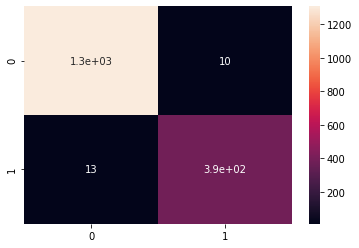

In [54]:
#Confusion Matrix Visualization-1
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

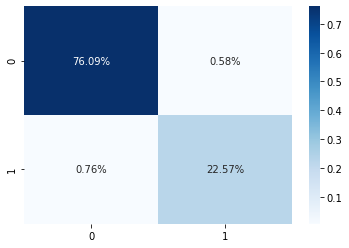

In [62]:
#Confusion Matrix Visualization-2
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')